# Clasficador por Regresión Logística
Se utiliza para problemas biclase y donde las clases son linealment separables. Sus prestaciones se pueden extender a problemas multiclase a traves de la tecnica "OvR". Este clasificador parte de la probabilidad a favor de un determinado evento, definida por la *razon de momios*.
1. Funciona para clases linealmente separables
2. Problemas binarios o biclase 
    One vs Rest (OvR)
    Se puede extender a problemas multiclase
    
## Razón de Momios
Relación de dos probibilidades, la razón a favor de un evento. Qué tan favorecido está un evento.

$$OR = \frac{p}{1-p}$$

donde $p$ es la probabilidad del evento. 

Al OR le podemos calcular el logaritmo para obtener la función **logit**.

$$logit(p)= \log\frac{p}{1-p}$$

en terminos de los parametros de entrada a nuestra clasificador tendremos:
$$logit(p)= logit(P(y =1| \mathbf{x}))= w_0x_0 + w_1x_1+\dots + w_{1-p}x_{1-p}$$

Cuando la razón de momios es muy pequeña sacamos logit para agrandarla


    Lo que queremos hacer es depejar la probabilidad del evento, que se va a relacionar con la probabilidad de que una observación pertenzca a la clase con etiqueta $y-1$. Para ello utllizamos la función inversa, que se denomina **sigmoide**

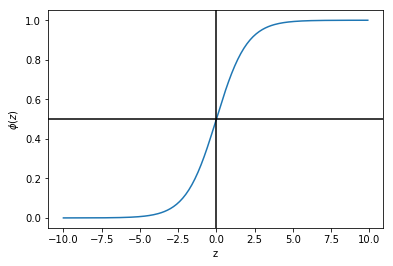

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoide(z):
    return 1.0/(1.0 + np.exp(-z))

# Para probarlo necesitamos un vector de entrada que es z

z = np.mgrid[-10:10:0.1]
fi = sigmoide(z)

# para graficar 

plt.plot(z,fi)
plt.axvline(0,0, color='k')
plt.axhline(y=0.5, color='k')
plt.ylabel('$\phi(z)$')
plt.xlabel('z')
plt.show()

# Base de datos (Iris)

Muy utilizado para probar los algoritmos de ML, Consiste en 150 observaciones y 3 clases(50 observaciones por clase). Las tres clases son las siguientes: *Iris Setosa*, *Iris Versicolor*, *Iris Virginica*. Cada observación tiene cuatro caracteristicas largo y ancho del sépalo y el largo y ancho del petalo

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/P%C3%A9talo-s%C3%A9palo.jpg/220px-P%C3%A9talo-s%C3%A9palo.jpg)

In [21]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

print(np.unique(y))

[0 1 2]


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

def remocion_train(X):
    X = X - X.mean(axis=0)
    X = X/X.std(axis=0)
    
    return X

def remocion_test(X_test):
    media = X_train.mean(axis=0)
    desviacion = X_train.std(axis=0)
    
    X_test = X_test - media
    X_test = X_test/desviacion
    
    return X_test

x_train_norm = remocion_train(X_train)
x_test_norm = remocion_test(X_test)

# ahora entrenamos el clasificador 

clasificador = LogisticRegression(C=10.0, random_state=0)
clasificador.fit(x_train_norm, y_train)

y_pred = clasificador.predict(x_test_norm)
print('las muestras clasificadas fueron %d'%(y_test != y_pred).sum())

las muestras clasificadas fueron 2
